In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import ToktokTokenizer #this allows us to turn a sentence into a list of words. If you do not have
                                          #the package nltk type in the anaconda prompt: conda install -c anaconda nltk 

tokenizer = ToktokTokenizer()

import matplotlib.pyplot as plt  #This is a python library for plotting
import seaborn as sns

#This allows you to see your plots in jupyter notebook
%matplotlib inline 

# Lexicon-based sentiment analysis
This sentiment analysis will be based on this lexicon: https://github.com/sebastianruder/emotion_proposition_store/tree/master/NRC-Emotion-Lexicon-v0.92
credits to Cláudio Vieira for part of the tutorial.

In [3]:
# Let's import the lexicon from the txt file
emolex = pd.read_csv("./NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep="\t", header=None, names = ['word', 'emotion', 'value'])
emolex = emolex.groupby(['word', 'emotion']).sum()

In [4]:
emolex.head(20) #As you can see, each word is given a score in several emotions. The score of the text will simply be 
                #a sum of the scores of each word in each emotion

value
word   emotion            
aback  anger             0
       anticipation      0
       disgust           0
       fear              0
       joy               0
       negative          0
       positive          0
       sadness           0
       surprise          0
       trust             0
abacus anger             0
       anticipation      0
       disgust           0
       fear              0
       joy               0
       negative          0
       positive          0
       sadness           0
       surprise          0
       trust             1

In [5]:
# Convert lexicon to a dataframe, where each column will be an emotion and each line a word. This may take a while
words = list(emolex.index.get_level_values(0).drop_duplicates())
matlex = pd.DataFrame(index=words, columns = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
                                              'negative', 'positive', 'sadness', 'surprise', 'trust'])

for word in words:
    matlex.loc[word] = emolex.xs(word).T.values

In [7]:
def tokenize(string):
    return tokenizer.tokenize(string.lower())

def wordLookup(token): 
    try:
        return matlex.loc[token].values
    except:
        return np.zeros(10)
    
def extractEmotions(string):
    values = np.zeros(10)
    for i in tokenize(string):
        values = values + wordLookup(i)
    return values

# Getting sentiment for tweets about game of thrones 

In [18]:
tweets1 = pd.read_csv('game1.csv', header=None)
tweets1.columns=['date','tweet']

tweets2 = pd.read_csv('game2.csv', header=None)
tweets2.columns=['date','tweet']

tweets3 = pd.read_csv('game3.csv', header=None)
tweets3.columns=['date','tweet']

In [19]:
emotionResults1 = []

for sentence in tweets1.tweet:
    emotionResults1.append(extractEmotions(sentence))

emo_df1 = pd.DataFrame(emotionResults1, columns=matlex.columns)

emotionResults2 = []

for sentence in tweets2.tweet:
    emotionResults2.append(extractEmotions(sentence))

emo_df2 = pd.DataFrame(emotionResults2, columns=matlex.columns)

emotionResults3 = []

for sentence in tweets3.tweet:
    emotionResults3.append(extractEmotions(sentence))

emo_df3 = pd.DataFrame(emotionResults3, columns=matlex.columns)

We can check what is the most common emotion in the list

In [20]:
positive1 = emo_df1.loc[emo_df1['positive']>emo_df1['negative']]
positive1.drop(columns=['positive'], inplace=True)
negative1 = emo_df1.loc[emo_df1['positive']<emo_df1['negative']]
negative1.drop(columns=['negative'], inplace=True)

sa_positive1 = pd.DataFrame(positive1.sum().sort_values())
sa_negative1 = pd.DataFrame(negative1.sum().sort_values())

positive2 = emo_df2.loc[emo_df2['positive']>emo_df2['negative']]
positive2.drop(columns=['positive'], inplace=True)
negative2 = emo_df.loc[emo_df2['positive']<emo_df2['negative']]
negative2.drop(columns=['negative'], inplace=True)

sa_positive2 = pd.DataFrame(positive2.sum().sort_values())
sa_negative2 = pd.DataFrame(negative2.sum().sort_values())

positive3 = emo_df3.loc[emo_df3['positive']>emo_df3['negative']]
positive3.drop(columns=['positive'], inplace=True)
negative3 = emo_df.loc[emo_df3['positive']<emo_df3['negative']]
negative3.drop(columns=['negative'], inplace=True)

sa_positive3 = pd.DataFrame(positive3.sum().sort_values())
sa_negative3 = pd.DataFrame(negative3.sum().sort_values())

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
sa1 = pd.DataFrame(emo_df1.sum().sort_values())
sa1['Percentage'] = np.nan
sa_positive1['Percentage'] = np.nan
sa_negative1['Percentage'] = np.nan

for i in range(len(sa1)):
    sa1['Percentage'][i] = round((sa1[0][i]/sa1[0].sum())*100,2)
    
for i in range(len(sa_positive1)):
    sa_positive1['Percentage'][i] = round((sa_positive1[0][i]/sa_positive1[0].sum())*100,2)
    
for i in range(len(sa_negative1)):
    sa_negative1['Percentage'][i] = round((sa_negative1[0][i]/sa_negative1[0].sum())*100,2)

In [22]:
sa2 = pd.DataFrame(emo_df2.sum().sort_values())
sa2['Percentage'] = np.nan
sa_positive2['Percentage'] = np.nan
sa_negative2['Percentage'] = np.nan

for i in range(len(sa2)):
    sa2['Percentage'][i] = round((sa2[0][i]/sa2[0].sum())*100,2)
    
for i in range(len(sa_positive2)):
    sa_positive2['Percentage'][i] = round((sa_positive2[0][i]/sa_positive2[0].sum())*100,2)
    
for i in range(len(sa_negative2)):
    sa_negative2['Percentage'][i] = round((sa_negative2[0][i]/sa_negative2[0].sum())*100,2)

In [23]:
sa3 = pd.DataFrame(emo_df3.sum().sort_values())
sa3['Percentage'] = np.nan
sa_positive3['Percentage'] = np.nan
sa_negative3['Percentage'] = np.nan

for i in range(len(sa3)):
    sa3['Percentage'][i] = round((sa3[0][i]/sa3[0].sum())*100,2)
    
for i in range(len(sa_positive3)):
    sa_positive3['Percentage'][i] = round((sa_positive3[0][i]/sa_positive3[0].sum())*100,2)
    
for i in range(len(sa_negative3)):
    sa_negative3['Percentage'][i] = round((sa_negative3[0][i]/sa_negative3[0].sum())*100,2)

In [24]:
sa_percentage1 = pd.DataFrame(sa1['Percentage'])
sa_percentage_po1 = pd.DataFrame(sa_positive1['Percentage'])
sa_percentage_neg1 = pd.DataFrame(sa_negative1['Percentage'])

sa_percentage2 = pd.DataFrame(sa2['Percentage'])
sa_percentage_po2 = pd.DataFrame(sa_positive2['Percentage'])
sa_percentage_neg2 = pd.DataFrame(sa_negative2['Percentage'])

sa_percentage3 = pd.DataFrame(sa3['Percentage'])
sa_percentage_po3 = pd.DataFrame(sa_positive3['Percentage'])
sa_percentage_neg3 = pd.DataFrame(sa_negative3['Percentage'])

In [25]:
index1 = list(sa_percentage1.index)
y1 = list(sa_percentage1['Percentage'])

index_po1 = list(sa_percentage_po1.index)
y_po1 = list(sa_percentage_po1['Percentage'])

index_neg1 = list(sa_percentage_neg1.index)
y_neg1 = list(sa_percentage_neg1['Percentage'])

index2 = list(sa_percentage2.index)
y2 = list(sa_percentage2['Percentage'])

index_po2 = list(sa_percentage_po2.index)
y_po2 = list(sa_percentage_po2['Percentage'])

index_neg2 = list(sa_percentage_neg2.index)
y_neg2 = list(sa_percentage_neg2['Percentage'])

index3 = list(sa_percentage3.index)
y3 = list(sa_percentage3['Percentage'])

index_po3 = list(sa_percentage_po3.index)
y_po3 = list(sa_percentage_po3['Percentage'])

index_neg3 = list(sa_percentage_neg3.index)
y_neg3 = list(sa_percentage_neg3['Percentage'])

In [98]:
normal = pd.DataFrame(sa_percentage1)
normal1 = normal.join(sa_percentage2, lsuffix=' Before episode (28th April)', rsuffix=' After episode (29th April)')
normal2 = normal1.join(sa_percentage3)
normal2 = normal2.rename(columns={'Percentage': 'Percentage After episode (30th April)'})

In [100]:
normal2 = normal2.T

In [101]:
normal2.style.highlight_max(color='lightgreen')

,disgust,surprise,anger,sadness,joy,fear,trust,negative,positive,anticipation
Percentage Before episode (28th April),3.45,4.97,6.14,6.21,8,9.03,12.12,13.88,18.06,18.12
Percentage After episode (29th April),5.65,4.12,7.89,6.86,5.93,10.42,12.05,15.82,17.86,13.38
Percentage After episode (30th April),3.13,3.86,5.16,4.37,6.63,13.66,16.99,11.49,20.6,14.12


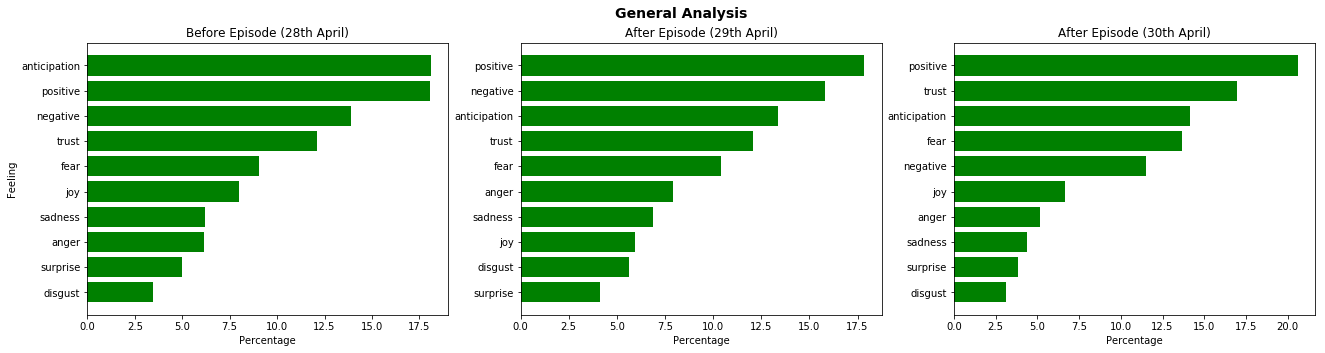

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(22,5))

ax[0].barh(index1, y1, align='center',
        color='green', ecolor='black')
ax[0].set_xlabel('Percentage')
ax[0].set_ylabel('Feeling')
ax[0].set_title('Before Episode (28th April)')

ax[1].barh(index2, y2, align='center',
        color='green', ecolor='black')
ax[1].set_xlabel('Percentage')
ax[1].set_title('After Episode (29th April)')


ax[2].barh(index3, y3, align='center',
        color='green', ecolor='black')
ax[2].set_xlabel('Percentage')
ax[2].set_title('After Episode (30th April)')

fig.suptitle('General Analysis', fontsize=14, fontweight='bold')
fig.savefig('general.png', transparent=False, dpi=120, bbox_inches='tight')
plt.show()

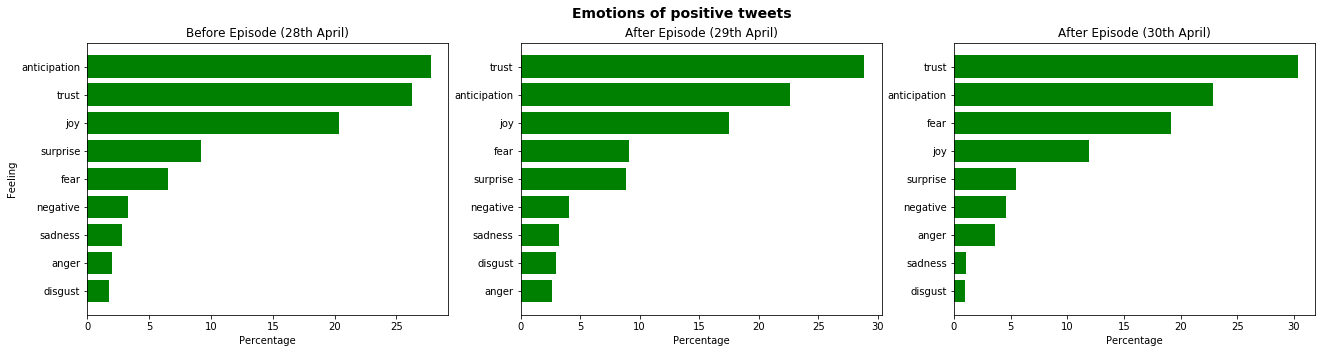

In [52]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(22,5))

ax[0].barh(index_po1, y_po1, align='center',
        color='green', ecolor='black')
ax[0].set_xlabel('Percentage')
ax[0].set_ylabel('Feeling')
ax[0].set_title('Before Episode (28th April)')

ax[1].barh(index_po2, y_po2, align='center',
        color='green', ecolor='black')
ax[1].set_xlabel('Percentage')
ax[1].set_title('After Episode (29th April)')


ax[2].barh(index_po3, y_po3, align='center',
        color='green', ecolor='black')
ax[2].set_xlabel('Percentage')
ax[2].set_title('After Episode (30th April)')

fig.suptitle('Emotions of positive tweets', fontsize=14, fontweight='bold')
fig.savefig('emotions_positive.png', transparent=False, dpi=120, bbox_inches='tight')
plt.show()

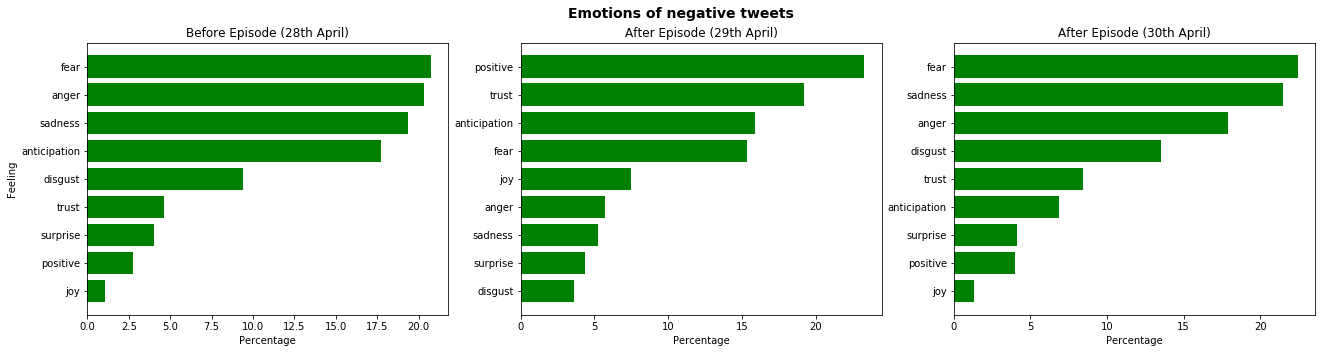

In [53]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(22,5))

ax[0].barh(index_neg1, y_neg1, align='center',
        color='green', ecolor='black')
ax[0].set_xlabel('Percentage')
ax[0].set_ylabel('Feeling')
ax[0].set_title('Before Episode (28th April)')

ax[1].barh(index_neg2, y_neg2, align='center',
        color='green', ecolor='black')
ax[1].set_xlabel('Percentage')
ax[1].set_title('After Episode (29th April)')


ax[2].barh(index_neg3, y_neg3, align='center',
        color='green', ecolor='black')
ax[2].set_xlabel('Percentage')
ax[2].set_title('After Episode (30th April)')

fig.suptitle('Emotions of negative tweets', fontsize=14, fontweight='bold')
fig.savefig('emotions_negative.png', transparent=False, dpi=120, bbox_inches='tight')
plt.show()